# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import pandas as pd
from collections import deque
from dqn_agent import Agent
from ddqn_agent import DDQN_Agent
import time
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [7]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, checkpoint_name='dqn.pth'):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start     # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        info = env.reset(train_mode=True)[brain_name]
        state = info.vector_observations[0] 
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            info = env.step(action)[brain_name]
            next_state = info.vector_observations[0]
            reward = info.rewards[0]
            done = info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), checkpoint_name)
            break
            
    return scores 

In [8]:
# Setting up Agent for vanilla dqn-approach
agent = Agent(state_size=37, action_size=4, seed=0)

In [9]:
start=time.time()
scores_dqn = dqn()
end = time.time()
print("Duration of Calculation is {} Minutes".format(round((end - start)/60)))

Episode 100	Average Score: 1.26
Episode 200	Average Score: 4.47
Episode 300	Average Score: 7.15
Episode 400	Average Score: 10.39
Episode 480	Average Score: 13.03
Environment solved in 480 episodes!	Average Score: 13.03
Duration of Calculation is 8 Minutes


Using a vanilla dqn-approach, it took ... Episodes to fullfill the criteria of an average score of at least 13.0. During the computational propcess, specifically within an Episode, the averages did fluctuate in an intense manner. Let us compare those values, to an approach with a double-dqn Agent. 

In [10]:
# Using Agent with Double-DQN-Approach
agent = DDQN_Agent(state_size=37, action_size=4, seed=0)

In [11]:
start=time.time()
# Setting different checkpoint for ddqn-approach
scores_ddqn = dqn(checkpoint_name='ddqn.pth')
end = time.time()
print("Duration of Calculation is {} Minutes".format(round((end - start)/60)))

Episode 100	Average Score: 0.60
Episode 200	Average Score: 3.70
Episode 300	Average Score: 8.21
Episode 400	Average Score: 11.21
Episode 448	Average Score: 13.05
Environment solved in 448 episodes!	Average Score: 13.05
Duration of Calculation is 7 Minutes


The scores of the double-dqn Agent were more steady during training, and in fact did perform slightly better. Nevertheless, only to a small degree. Lets compare scores and episodes visually! 

In [12]:
# Creating a function to transform the array's to a dataframe and for generating plots.
def scores_to_df(scores,colname):
    '''
    Params
    ======
        scores: score array of dqn-function
        colname: str for agenttype 
        
        Output: Dataframe
        
    '''
    df_dqn=pd.DataFrame(scores).rename(columns={0:str(colname)})
    # Moving Average over 100 
    df_dqn[colname+'_av']=round(df_dqn[colname].rolling(100,min_periods=1).mean(),2)
    
    #
    plt.figure(figsize=(20,10))
    plt.title('Comparision of Scores per Episodes with {}'.format(colname),size=15)
    plt.axhline(y=13., xmin=0.0, color='g', linestyle='dashdot', linewidth=2.0, label='Threshold')
    plt.plot(df_dqn[colname], label='Score')
    plt.plot(df_dqn[colname+'_av'],c='r',label='Mean over 100 Episodes')
    plt.ylabel('Score')
    plt.xlabel('Number of Episodes')
    plt.legend(loc='lower right', fontsize=10)

    
    
    return df_dqn

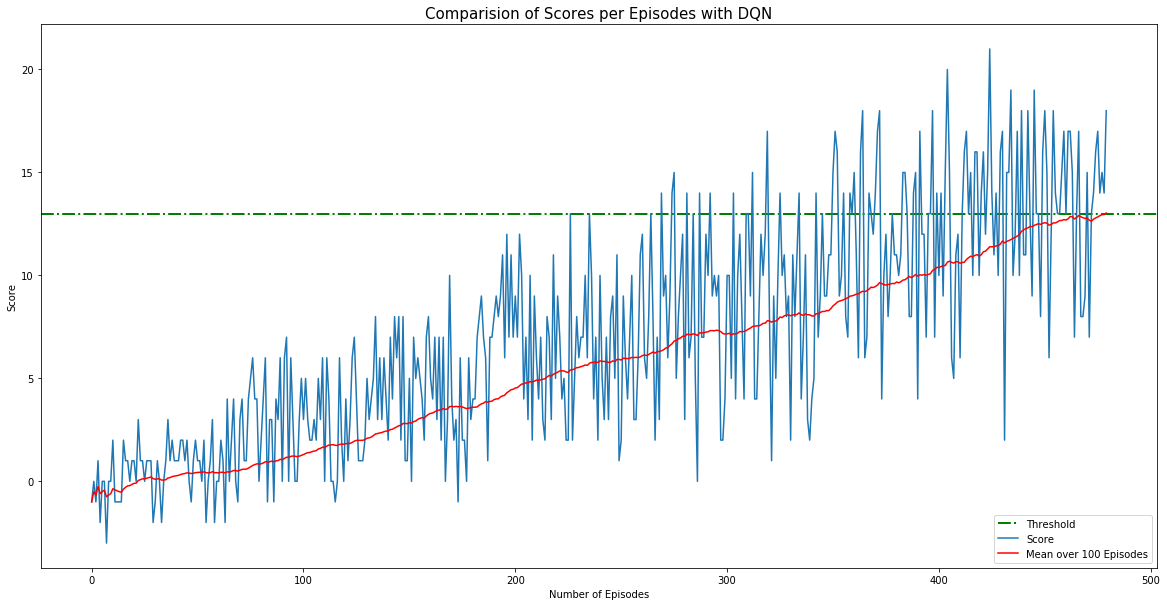

In [13]:
# Computing df and plot vanilla DQN
df_dqn=scores_to_df(scores_dqn,'DQN')

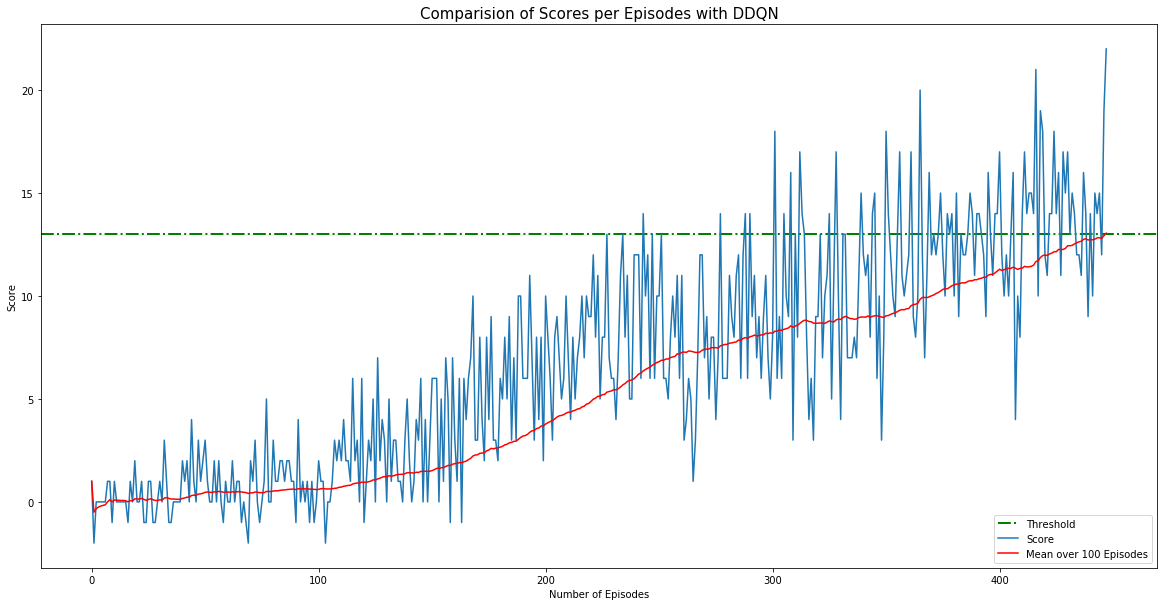

In [14]:
# Computing df and plot vanilla DDQN
df_ddqn=scores_to_df(scores_ddqn,'DDQN')

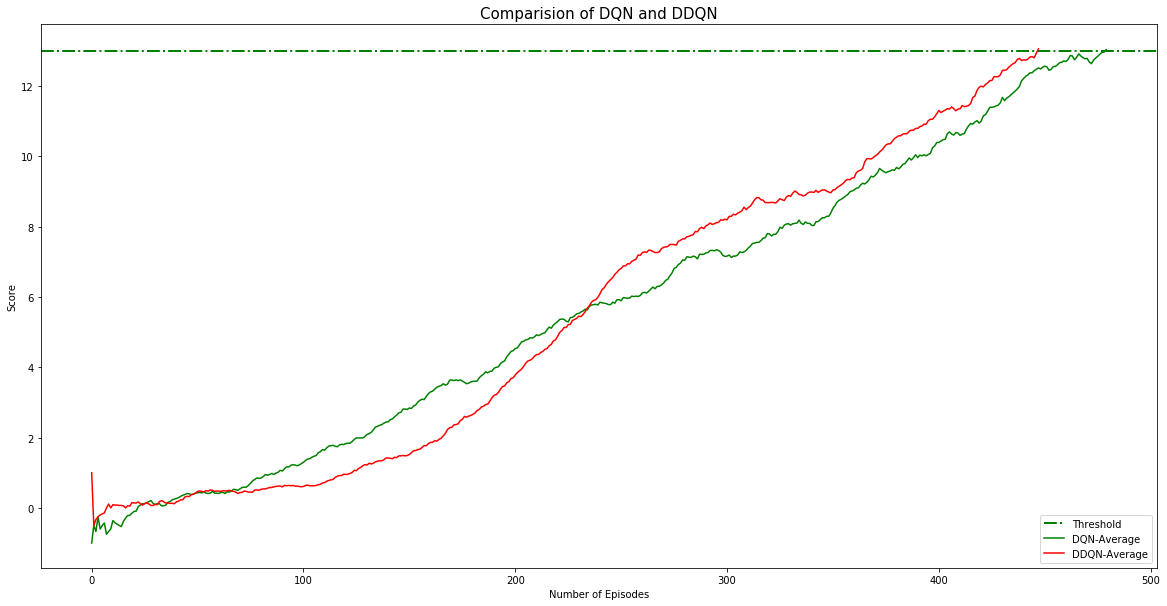

In [15]:
# Joining both frames 
df_complete=df_dqn.merge(df_ddqn,how='left',left_index=True,right_index=True)

# Plotting moving average for comparision 
plt.figure(figsize=(20,10))
plt.title('Comparision of DQN and DDQN',size=15)
plt.axhline(y=13., xmin=0.0, color='g', linestyle='dashdot', linewidth=2.0, label='Threshold')
plt.plot(df_dqn['DQN_av'],c='g', label='DQN-Average')
plt.plot(df_ddqn['DDQN_av'],c='r',label='DDQN-Average')
plt.ylabel('Score')
plt.xlabel('Number of Episodes')
plt.legend(loc='lower right', fontsize=10)
plt.show();

Comparing both moving averages per 100 episodes, it is noticeable that the DDQN Agent has a more constant increase, especially at the beginning of the training process. 

In [16]:
# Defining a function for reloading checkpoints and running model.
def load_play (n_episodes=5, max_t=1000,ddqn=False):
    ''''
     Params
    ======
        n_episodes: number of episodes
        max_t: number of timestamps
        ddqn: bool, wether to use dqn or ddqn agent
        
        Output: None
    
    
    '''     
    
    scores=[]
    
    
    if ddqn:
        agent = DDQN_Agent(state_size=37, action_size=4, seed=0)
        agent.qnetwork_local.load_state_dict(torch.load('ddqn.pth'))
    
    else: 
        agent = Agent(state_size=37, action_size=4, seed=0)
        agent.qnetwork_local.load_state_dict(torch.load('dqn.pth'))
 
    for i in range(1,n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for j in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            state = next_state
            score += reward
            if done:
                break
                
        scores.append(score)
        
        print("For Episode {} the achieved Score is {:.2f}".format(i, score))
    
    print("For all {} Episodes, the mean achieved Score is {}".format(n_episodes,round(np.mean(scores))))

In [17]:
load_play(ddqn=False)

For Episode 1 the achieved Score is 11.00
For Episode 2 the achieved Score is 18.00
For Episode 3 the achieved Score is 15.00
For Episode 4 the achieved Score is 18.00
For Episode 5 the achieved Score is 13.00
For all 5 Episodes, the mean achieved Score is 15.0


In [18]:
load_play(ddqn=True)

For Episode 1 the achieved Score is 18.00
For Episode 2 the achieved Score is 17.00
For Episode 3 the achieved Score is 15.00
For Episode 4 the achieved Score is 14.00
For Episode 5 the achieved Score is 18.00
For all 5 Episodes, the mean achieved Score is 16.0


Comparing both approaches on the environment, it seems that both - a DQN-Agent and a DDQN-Agent - achieve similar results. Here it would be interesting to do some further inverstigations on optimizing both Agents. 
A basic idea for an improvement would be, doing some hyperparameter tuning. Defining a grid for some of those paramters mentioned above, can give some insights, on how to improve the performence. 
In 
Further ideas on improving would involve the implementation of an dueling dqn, a prioritized experience replay! 

In [ ]:
env.close()